In [21]:
# Import necessary packages here.
# You may need to import more depending on your project's need

import os, sys

# File operations
import glob
import gzip
import json

# Math and data analysis
import numpy as np
import scipy as sc
import pandas as pd

# Data visualization
import matplotlib.pylab as plt

# Network analysis
import networkx as nx

# Other packages to consider
# Seaborn
# NLTK, Gensim
# Scikit-learn

from collections import Counter
from itertools import chain
import re
from zipfile import ZipFile

# Data preperation

Your data comes from [Twitter's information operation website](https://transparency.twitter.com/en/reports/information-operations.html).

Although this dataset has a structured information, you may still want to check if all the datasets are in the same format and reformat it if needed. This is important since all the code below will work if there is a consistent data format.

In [22]:
list_of_directories = [temp[0] for temp in os.walk("/cta/scratch/DATASETS/TwitterReleases/InformationOperations/")][1:]

In [23]:
list_of_zip = list()
for directory in list_of_directories:
    for temp in glob.glob(directory + "**/*.zip"):
        list_of_zip.append(temp)

In [24]:
list_of_csv = list()

for zip_ in list_of_zip:
    zf = ZipFile(zip_) 
    # if you want to see all files inside zip folder
    temp = zf.namelist()
    for csv in temp:
        if csv[-3:] == 'csv':
            list_of_csv.append((zip_,csv))
print(list_of_csv)

[('/cta/scratch/DATASETS/TwitterReleases/InformationOperations/202006/hashed_2020_05_turkey_052020_turkey_052020_tweets_csv_hashed.zip', 'turkey_052020_tweets_csv_hashed/turkey_052020_tweets_csv_hashed_2009.csv'), ('/cta/scratch/DATASETS/TwitterReleases/InformationOperations/202006/hashed_2020_05_turkey_052020_turkey_052020_tweets_csv_hashed.zip', 'turkey_052020_tweets_csv_hashed/turkey_052020_tweets_csv_hashed_2019_06.csv'), ('/cta/scratch/DATASETS/TwitterReleases/InformationOperations/202006/hashed_2020_05_turkey_052020_turkey_052020_tweets_csv_hashed.zip', 'turkey_052020_tweets_csv_hashed/turkey_052020_tweets_csv_hashed_2017_01.csv'), ('/cta/scratch/DATASETS/TwitterReleases/InformationOperations/202006/hashed_2020_05_turkey_052020_turkey_052020_tweets_csv_hashed.zip', 'turkey_052020_tweets_csv_hashed/turkey_052020_tweets_csv_hashed_2019_01.csv'), ('/cta/scratch/DATASETS/TwitterReleases/InformationOperations/202006/hashed_2020_05_turkey_052020_turkey_052020_tweets_csv_hashed.zip', 't

In [25]:
zf = ZipFile(list_of_csv[18][0])
df = pd.read_csv(zf.open(list_of_csv[18][1]), low_memory=False)

In [ ]:
df

In [26]:
# Define locations for datasets
file_path = '/cta/scratch/DATASETS/TwitterReleases/InformationOperations/202102/'
DATA_PATH = 'hashed_2020_12_armenia_202012_armenia_202012_tweets_csv_hashed.csv'

# Read files using Pandas or file reader

df = pd.read_csv(file_path + DATA_PATH, low_memory=False)
df.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
0,1331706590525874184,qXsKFeuypKnamstyGzyIyb5ESxeYVrF4lfj+DoNEiBI=,qXsKFeuypKnamstyGzyIyb5ESxeYVrF4lfj+DoNEiBI=,qXsKFeuypKnamstyGzyIyb5ESxeYVrF4lfj+DoNEiBI=,Azerbaijan,https://t.co/7q3bPlI5Ne является независимым и...,https://t.co/TY3gz33nIF,0,0,2020-11-23,...,NaN,absent,absent,0,0,0,0,"['haqqinaz', 'haqqin', 'haqqinz']",['https://haqqin.az/news/194712'],[]
1,1100358276435398656,2rg8fiE11JB8Bh69A6aJWeRSBPcGTAmK8wnpFpH0=,2rg8fiE11JB8Bh69A6aJWeRSBPcGTAmK8wnpFpH0=,2rg8fiE11JB8Bh69A6aJWeRSBPcGTAmK8wnpFpH0=,Azerbaijan,I’ve learned I don’t know anything. Have also...,NaN,145,530,2019-02-21,...,NaN,absent,absent,0,0,0,0,"['Azerbaijan', 'shareforkhojaly', 'justicefork...",[],[]
2,1100389340914569216,vrJSje34LOxmhLf7y0QqVdtulQZBm6QfOtxswidhrs=,vrJSje34LOxmhLf7y0QqVdtulQZBm6QfOtxswidhrs=,vrJSje34LOxmhLf7y0QqVdtulQZBm6QfOtxswidhrs=,"Agri, Turkey",Love the life to its fullest\n#Shareforkhojaly...,NaN,146,423,2019-02-21,...,NaN,absent,absent,1,0,0,0,"['shareforkhojaly', 'justiceforkhojaly']",[],[]
3,724982683118358528,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,Azerbaijan,Lieutenant General is an Azerbaijani politicia...,https://t.co/06ojhMm2e6,112,15,2016-04-10,...,NaN,absent,absent,0,0,0,0,[],['http://www.unaoc.org/wp-content/uploads/2016...,[]
4,728142042765742080,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,Azerbaijan,Lieutenant General is an Azerbaijani politicia...,https://t.co/06ojhMm2e6,112,15,2016-04-10,...,NaN,absent,absent,0,0,0,0,['Azerbaijan'],['http://bit.ly/24tbEqN'],[]


# Check basic statistics before analysis

In [8]:
# Count and number of record in the dataset
# df['tweetid'].value_counts()
df.shape[0]

72960

In [9]:
# Print sample of the data to see which fields are available

# df.columns
# df.tail()

df.head(10)

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
0,1331706590525874184,qXsKFeuypKnamstyGzyIyb5ESxeYVrF4lfj+DoNEiBI=,qXsKFeuypKnamstyGzyIyb5ESxeYVrF4lfj+DoNEiBI=,qXsKFeuypKnamstyGzyIyb5ESxeYVrF4lfj+DoNEiBI=,Azerbaijan,https://t.co/7q3bPlI5Ne является независимым и...,https://t.co/TY3gz33nIF,0,0,2020-11-23,...,NaN,absent,absent,0,0,0,0,"['haqqinaz', 'haqqin', 'haqqinz']",['https://haqqin.az/news/194712'],[]
1,1100358276435398656,2rg8fiE11JB8Bh69A6aJWeRSBPcGTAmK8wnpFpH0=,2rg8fiE11JB8Bh69A6aJWeRSBPcGTAmK8wnpFpH0=,2rg8fiE11JB8Bh69A6aJWeRSBPcGTAmK8wnpFpH0=,Azerbaijan,I’ve learned I don’t know anything. Have also...,NaN,145,530,2019-02-21,...,NaN,absent,absent,0,0,0,0,"['Azerbaijan', 'shareforkhojaly', 'justicefork...",[],[]
2,1100389340914569216,vrJSje34LOxmhLf7y0QqVdtulQZBm6QfOtxswidhrs=,vrJSje34LOxmhLf7y0QqVdtulQZBm6QfOtxswidhrs=,vrJSje34LOxmhLf7y0QqVdtulQZBm6QfOtxswidhrs=,"Agri, Turkey",Love the life to its fullest\n#Shareforkhojaly...,NaN,146,423,2019-02-21,...,NaN,absent,absent,1,0,0,0,"['shareforkhojaly', 'justiceforkhojaly']",[],[]
3,724982683118358528,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,Azerbaijan,Lieutenant General is an Azerbaijani politicia...,https://t.co/06ojhMm2e6,112,15,2016-04-10,...,NaN,absent,absent,0,0,0,0,[],['http://www.unaoc.org/wp-content/uploads/2016...,[]
4,728142042765742080,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,Azerbaijan,Lieutenant General is an Azerbaijani politicia...,https://t.co/06ojhMm2e6,112,15,2016-04-10,...,NaN,absent,absent,0,0,0,0,['Azerbaijan'],['http://bit.ly/24tbEqN'],[]
5,727245477867974656,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,Azerbaijan,Lieutenant General is an Azerbaijani politicia...,https://t.co/06ojhMm2e6,112,15,2016-04-10,...,NaN,absent,absent,0,0,0,0,[],['http://bit.ly/1NQeVZu'],[]
6,728581480545325057,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=,Azerbaijan,Lieutenant General is an Azerbaijani politicia...,https://t.co/06ojhMm2e6,112,15,2016-04-10,...,NaN,absent,absent,0,0,0,0,[],['http://bit.ly/23uJ7LI'],[]
7,650550450320601088,FqVhnX8XDzPsUa4tn29gHXs+N6ikWJoKmYhuo5pG1cE=,FqVhnX8XDzPsUa4tn29gHXs+N6ikWJoKmYhuo5pG1cE=,FqVhnX8XDzPsUa4tn29gHXs+N6ikWJoKmYhuo5pG1cE=,"Baku, Azerbaijan","Информационная площадка, которая закладывается...",http://t.co/p9VLSVnhtT,118,26,2014-11-19,...,NaN,absent,absent,0,0,0,0,['novosti_az'],['http://bit.ly/1OQ0wM0'],[]
8,661914640331333632,FqVhnX8XDzPsUa4tn29gHXs+N6ikWJoKmYhuo5pG1cE=,FqVhnX8XDzPsUa4tn29gHXs+N6ikWJoKmYhuo5pG1cE=,FqVhnX8XDzPsUa4tn29gHXs+N6ikWJoKmYhuo5pG1cE=,"Baku, Azerbaijan","Информационная площадка, которая закладывается...",http://t.co/p9VLSVnhtT,118,26,2014-11-19,...,NaN,absent,absent,0,0,0,0,['novosti_az'],['http://bit.ly/1RSYxEL'],[]
9,535744142437933056,FqVhnX8XDzPsUa4tn29gHXs+N6ikWJoKmYhuo5pG1cE=,FqVhnX8XDzPsUa4tn29gHXs+N6ikWJoKmYhuo5pG1cE=,FqVhnX8XDzPsUa4tn29gHXs+N6ikWJoKmYhuo5pG1cE=,"Baku, Azerbaijan","Информационная площадка, которая закладывается...",http://t.co/p9VLSVnhtT,118,26,2014-11-19,...,NaN,absent,absent,0,0,0,0,['novosti_az'],['http://bit.ly/1x9Xh4r'],[]


# Top-ranked items in the dataset

In [10]:
# Print top-50 users in terms of content creation

# Unhashed data might yield more meaningful results

df['user_display_name'].value_counts()[:50]

1Pqyt2W75POPX+6zd9UdZL89ALBtPPELN4NPrly0nag=    22351
46eJLsV6+iDw1rVv36i9NONigsfqfTfQ9EBzXr901c=     19393
FqVhnX8XDzPsUa4tn29gHXs+N6ikWJoKmYhuo5pG1cE=    15856
Rgex8nPtn9Y4bvWf9RMb8yI2GGWP65yTXb+9ZygHU=      14128
uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=        334
rOr0az+xkI49HIn0VwU6R1Som+obkg6E84AqY5hnoTo=       82
DbsuQUF4Wnqdvjb44vyvYKty3wqZYhy99pKmyKzw=          80
eo0xpq4n+8U5Uy2FZlrcxtBEd0gldAZyDPDT+7D+wY=        61
OVC8cA0LTalwGqP2ooefLPsdlJmbB5wF+hpKZuRp0=         60
p8PbTRSSnu3Re1jI+c33x2TdFAKbqe6P5ZSQGmlbQ=         56
lLmWQV16uj+BD2rwXOahQYX2GdGcAMsDlIFzIidYk4=        51
vrJSje34LOxmhLf7y0QqVdtulQZBm6QfOtxswidhrs=        51
2rg8fiE11JB8Bh69A6aJWeRSBPcGTAmK8wnpFpH0=          49
Tf0FY7EDYEUVzBsJNSLmYJ0nBSU4Z38qsQxp48GpxA=        46
9tv1gRACFz8IPY6lCkXCgaXEJh1Ol2Fk78bhuCGhyA=        38
RjBg+chC8o0DUgVLzMEtJKK1MrsHCwbRSJs1MSbJWU=        36
e7MA8928eiTvHTGw7lNORtEVx85xr8YkmbJuYv80=          33
wkWpPqExTdYSLeborWuyIoY5ea9gTGDm3ZB3Ct4m5A=        33
Nc3kQgzsNAqdsI8HIZvLUBqBrC2R

In [27]:
# Print top-100 hashtags

x = "['elturco', 'ardaturan', 'elturco']"

# 1, 9, 12, 22

# [elturco, ardaturan, elturco]

def retrieveWords(string):

    arr = []
    lst_word = list()
    word_dict = dict()
    
    for index, char in enumerate(string):
        if char == "'":
            arr.append(index)
            
    for i in range(int(len(arr)/2)):
        elt = string[arr[0]+1:arr[1]].lower()
        lst_word.append(elt)
        arr.remove(arr[0])
        arr.remove(arr[0])
        
    for key in lst_word:
        if key in word_dict.keys():
            word_dict[key] += 1
        else:
            word_dict[key] = 1

    return word_dict

def findTop100Hashtags(df):
    hash_dict = dict()
    if "hashtags" not in df.columns:
        print("No hashtags, users only")
    else:
        for hashtag in df["hashtags"]:
            if type(hashtag) is str:
                word_counts = retrieveWords(hashtag)
                for key, value in word_counts.items():
                    if key in hash_dict.keys():
                        hash_dict[key] += value
                    else:
                        hash_dict[key] = value

        return sorted(hash_dict.items(), key=lambda item: item[1], reverse=True)[:100]

findTop100Hashtags(df)

# Need help on the omission of meaningless hashtags (exp: 'r', 'kt', etc.)

[('haqqin', 39756),
 ('haqqin_az', 26898),
 ('novosti_az', 15817),
 ('today_az', 13963),
 ('haqqinaz', 12591),
 ('karabakhnow', 1370),
 ('nkpeace', 1034),
 ('azerbaijan', 685),
 ('armenia', 467),
 ('karabaghnow', 384),
 ('aztwi', 294),
 ('virtualaz', 258),
 ('followback', 248),
 ('karabakh', 217),
 ('artsakhstrong', 162),
 ('shareforkhojaly', 125),
 ('justiceforkhojaly', 124),
 ('teamfollowback', 124),
 ('tfbjp', 124),
 ('teamhitfollow', 124),
 ('autofollow', 124),
 ('mustfollow', 124),
 ('followngain', 124),
 ('turkey', 82),
 ('artsakh', 71),
 ('ussr', 67),
 ('sumgait', 50),
 ('turkeycoup', 49),
 ('istanbul', 47),
 ('armenian', 43),
 ('sumgait1988', 42),
 ('ankara', 42),
 ('armeniangenocide', 29),
 ('neveragain', 24),
 ('karabakhisazerbaijan', 23),
 ('azerbaijani', 22),
 ('unaocbaku2016', 22),
 ('stopaliyev', 22),
 ('genocide', 22),
 ('nkr', 21),
 ('ermenisoykırımı', 21),
 ('baku', 20),
 ('russia', 19),
 ('azərbaycan', 18),
 ('chechina', 16),
 ('aliyev', 15),
 ('un', 14),
 ('boycottba

In [12]:
#for temp in list_of_csv:
for temp in [("china_052020_tweets_csv_hashed.csv", "")]:
    try:
        zf = ZipFile(temp[0])
        df = pd.read_csv(zf.open(temp[1]), low_memory=False)
        print(temp[1])
        print(findTop100Hashtags(df))
    except:
        print(temp)
        print("This file cannot be read by ZipFile")

turkey_052020_tweets_csv_hashed/turkey_052020_tweets_csv_hashed_2009.csv
[('#fotokritik', 1)]
turkey_052020_tweets_csv_hashed/turkey_052020_tweets_csv_hashed_2019_06.csv
[('vuk359', 85201), ('1416ylsy', 47621), ('eyt', 35776), ('5bingıdamühendisi', 35442), ('1416ylsytazminat', 35267), ('külliyeye1000mahkumyakını', 28348), ('tazminat', 21212), ('emeklilikteyaşatakılanlar', 15467), ('faizaffi', 12898), ('hayırlıcumalar', 11903), ('barışpınarıharekatı', 11785), ('ff', 11454), ('sondaki̇ka', 11325), ('15temmuzdestanı', 10609), ('pazartesi', 9070), ('meb', 9013), ('cumartesi', 8964), ('pazar', 8358), ('hükümetinafsözüvar', 8300), ('eyt4447i̇ptaldiyor', 8279), ('vuk359esnafamüebbetceza', 8174), ('ylsy', 8011), ('çekehapiscezasıkalksın', 7964), ('eytninsessizçığlığı', 7863), ('15temmuz', 7460), ('adlimahkumkapsamlıeşityasa', 7440), ('yuksekfaiz', 7178), ('sonradedimki', 7059), ('rehabilitasyonöğrtumutol', 7030), ('dövizborcu', 6966), ('malatya', 6520), ('salı', 6441), ('i̇stanbul', 6380), ('d

turkey_052020_tweets_csv_hashed/turkey_052020_tweets_csv_hashed_2017_06.csv
[('15temmuz', 5847), ('ff', 5361), ('dirilişiyiekibi', 5029), ('kudüsesahipçık', 4947), ('pazartesi', 4624), ('freequds', 3593), ('arakan', 3590), ('kudüs', 3170), ('atatürk', 3170), ('dirilişertuğrul', 2966), ('kahramankazan', 2920), ('türk', 2568), ('tasarimmimari', 2525), ('kılıçdaroğlunesöyledi', 2467), ('allah', 2389), ('adaletyürüyüşü', 2152), ('türkiye', 2086), ('hayırlıcumalar', 2063), ('betnano', 1790), ('adalet', 1774), ('erdoğani̇leölümüne', 1757), ('beşiktaş', 1753), ('abd', 1631), ('rt', 1610), ('sondakika', 1530), ('islamicunityforquds', 1525), ('chp', 1516), ('protestoediyorum', 1490), ('29ekim1923', 1478), ('ayyıldızasözyaz', 1466), ('deprem', 1438), ('10kasım', 1435), ('yahakyabatıl', 1425), ('asrınliderierdoğan', 1425), ('yağmur', 1424), ('reis', 1421), ('erzurumutanıtıyoruz', 1398), ('şeddelifaşistchp', 1378), ('gönlümüzaksa', 1367), ('atabirlik', 1367), ('i̇slamınonurukudüs', 1346), ('kudüsü

turkey_052020_tweets_csv_hashed/turkey_052020_tweets_csv_hashed_2015.csv
[('600yıllıkfilminreklamarasıbitti', 6111), ('chp', 5356), ('i̇nlerinegiriliyor', 5265), ('ff', 5015), ('daimaadaletdaimakalkınma', 4587), ('ak', 4421), ('ast', 3960), ('birbilgeadamdavutoğlu', 3883), ('devletiebedmüddet', 3432), ('yenitürkiyebaşkanlıkdiyor', 3143), ('başkanrterdoğantrtde', 3071), ('i̇kicihangüneşiefendimiz', 3068), ('hadis', 2992), ('enbüyükteröristnetanyahu', 2981), ('aylinnazlıakaçokeğlendinmi', 2910), ('rt', 2850), ('yücedivantuzağıbozuldu', 2796), ('ciamaatınmossadlaişbirliği', 2712), ('faizi̇ndirimii̇stiyoruz', 2530), ('özgecanaslan', 2520), ('starmetre', 2203), ('senibaşkanyapacağız', 2185), ('onlarkonusurakpartiyapar', 2185), ('umutluyumçünkü', 2167), ('youareaterroristnetanyahu', 2053), ('cesurbiradamrterdoğan', 2039), ('dirilişerdoğan2023', 1980), ('başkanlıksistemigelmeli', 1872), ('childmurderernetenyahu', 1794), ('basınözgürlüğümaskesi', 1793), ('kazan', 1704), ('1türkiyei̇stiyorum', 

turkey_052020_tweets_csv_hashed/turkey_052020_tweets_csv_hashed_2010.csv
[('klisebitirme', 1), ('sl', 1), ('red', 1), ('#pismanim', 1)]
turkey_052020_tweets_csv_hashed/turkey_052020_tweets_csv_hashed_2016_06.csv
[('kahramankazan', 8055), ('5binveterinerhekim', 6682), ('terörelanetolsun', 4940), ('tur', 4820), ('ahmetfuadi', 4722), ('haber', 3816), ('yalnızdeğilsinerdoğan', 3170), ('ekimatamasıgthbden', 3042), ('sondakika', 3016), ('ff', 2551), ('cerablus', 2526), ('halep', 2435), ('tekmillettekyürek', 2250), ('gthb20binboskadro', 2114), ('kalbimdekideniz', 2060), ('cumhurbaşkanıerdoğan', 1879), ('haleptekatliamvar', 1610), ('gazetesozcu', 1599), ('sondaki̇ka', 1439), ('bizbittidemedenbitmez', 1378), ('fetö', 1340), ('gündem', 1315), ('dijitalarınma', 1308), ('ömerhalisdemir', 1290), ('ramazan', 1255), ('kayseri', 1236), ('milletyenilmeztürkiyebölünmez', 1212), ('worldleadererdogan', 1190), ('gaziantep', 1186), ('adnanmenderes', 1183), ('15temmuz', 1181), ('tasarimmimari', 1134), ('hayı

turkey_052020_tweets_csv_hashed/turkey_052020_tweets_csv_hashed_2018_01.csv
[('afrin', 9048), ('devam', 7872), ('afrinoperasyonu', 7177), ('ff', 6798), ('zeytindalıharekatı', 6533), ('türk', 5172), ('pazartesi', 4294), ('dirilisiyiekibi', 4169), ('erdoğandiyorki', 4107), ('alemlererahmethzmuhammed', 3856), ('vakittürkiyevakti', 3844), ('ico', 3790), ('dirilişertuğrul', 3523), ('dirilişturangrupları', 3354), ('devletinafsözüvar', 3198), ('çanakkalegeçilmez', 3099), ('nakba70', 3019), ('blockchain', 3002), ('kılıçdaroğlunesöyledi', 2979), ('allah', 2816), ('reisleyizçünkü', 2786), ('afrinebüyüktaarruz', 2691), ('vatani̇çinölmek', 2565), ('oyumuzreiseçünkü', 2545), ('mustafakemalatatürk', 2525), ('baykemaladayol', 2479), ('chp', 2451), ('dirilişiyiekibi', 2437), ('cumartesi', 2400), ('kkdeninceaklima', 2390), ('türkiyeşahlanıyor', 2382), ('zaferhilalindir', 2373), ('başaramayacaksınız', 2365), ('bircihanreisi', 2307), ('mazbatalıypgliler', 2292), ('seçimehazırızreis', 2257), ('siztopunuzb

china_052020_tweets_csv_hashed.csv
[('香港', 51747), ('郭文贵', 47044), ('班农', 8542), ('暴徒', 8065), ('守護香港', 7803), ('肺炎', 7175), ('病毒', 5560), ('milesguo', 4476), ('守护香港', 4460), ('香港警察', 4239), ('游行', 4199), ('covid19', 4057), ('黑警', 3984), ('疫情', 3388), ('废青', 2977), ('香港暴徒', 2604), ('hongkong', 2588), ('止暴制亂', 2440), ('香港遊行', 2440), ('香港游行', 2398), ('警察', 2290), ('暴徒废青', 2255), ('反修例', 2163), ('港独', 2107), ('止暴製亂', 2094), ('武汉疫情', 2070), ('武汉加油', 2058), ('逃犯条例', 2021), ('新冠肺炎', 2003), ('中国加油', 1963), ('撐警行動', 1847), ('严惩暴徒', 1731), ('曱甴', 1709), ('hk', 1665), ('王立强', 1493), ('反暴力遊行', 1485), ('文贵', 1473), ('骗子', 1375), ('廢青', 1183), ('王雁平', 1143), ('新冠病毒', 1113), ('颜色革命', 1099), ('顏色革命', 1031), ('暴力', 1013), ('全民撐警', 998), ('蔡英文', 972), ('武汉肺炎', 928), ('纽约时报', 917), ('廢青遊行', 873), ('香港選舉', 827), ('法制基金', 825), ('止暴制乱', 806), ('黎智英', 791), ('撐港警', 790), ('禁蒙面法', 785), ('郭骗子', 735), ('駐港部隊', 682), ('华尔街日报', 681), ('立法會', 679), ('中國香港', 677), ('台湾选举', 658), ('新冠疫情', 629), ('暴徒廢青', 607), ('香

iran_201901_1_tweets_csv_hashed_3.csv
[('sachtimes', 14221), ('pakonlinenews', 11611), ('deleteisrael', 9499), ('palestine', 7801), ('husainforjustice', 7570), ('science', 7238), ('letkashmirbefree', 6716), ('whyisupportik', 6694), ('qudscapitalofpalestine', 6334), ('letsfightterrorism', 5773), ('نواز_کا_نظریہ_کرپشن', 5765), ('pakistanwillriseagain', 5533), ('teachingsofnabisaw', 5527), ('ناکام_نواز_حکومت', 5492), ('letseducatepakistan', 5479), ('kpklovespti', 5462), ('beabettermuslim', 5259), ('standupforteamgreen', 5112), ('art', 4976), ('gaza', 4894), ('bringlootedmoneyback', 4808), ('israel', 4799), ('saverohingya', 4739), ('قاتل_پنجاب_حکومت', 4652), ('zionismagainsthumanity', 4630), ('کرپشن_فری_پاکستان', 4615), ('freesindhfromppp', 4486), ('muslimsareunited', 4463), ('trump', 4412), ('blessedfriday', 4396), ('nomoreyellowjournalism', 4347), ('ahlulbayt', 4321), ('islamdignifieswomen', 4253), ('breaking', 4243), ('muslimsrejecttrump', 4241), ('pmlngoonsattacksc', 4235), ('الحرب_الف

venezuela_201901_1_tweets_csv_hashed_2.csv
[('noticias', 752543), ('rt', 416592), ('news', 129395), ('android', 110048), ('mundo', 90460), ('latam', 71959), ('deportes', 60699), ('tropa', 47091), ('legionfanb', 44235), ('vzla', 40788), ('tecnologia', 39869), ('lechuguinos', 32003), ('actualidadrt', 26298), ('venezuela', 20592), ('tecnología', 17930), ('ahora', 17582), ('envivo', 17310), ('interesante', 15116), ('videojuegos', 14352), ('socialmedia', 14254), ('eeuu', 13163), ('video', 12999), ('fanbesvenezuela', 12820), ('technology', 11077), ('opinión', 8554), ('segundadivisionb', 8349), ('ramosallup666', 7441), ('siguemeytesigo', 6999), ('chistes', 6450), ('fanb', 6276), ('loultimo', 6100), ('siria', 6039), ('rusia', 5619), ('barinas', 5606), ('colombia', 5472), ('viaalterna', 5285), ('tuitutil', 5107), ('brasil', 4815), ('cuba', 4556), ('argentina', 4421), ('gmas', 4183), ('lomaspopular', 3957), ('hoy', 3946), ('fanbeshonorygloria', 3944), ('trump', 3620), ('rio2016', 3597), ('méxico

saudi_arabia_112019_tweets_csv_hashed/saudi_arabia_112019_tweets_csv_hashed_9.csv
[('غرد_بذكر_الله', 31393), ('bahrain', 16285), ('الهلال', 16175), ('السعودية', 15472), ('رتويت', 14158), ('دعاء_لربي', 13714), ('النصر', 12544), ('ريتويت', 9938), ('كنز_المسلم', 7606), ('ff', 6368), ('ksa', 5863), ('quran', 5166), ('الرياض', 4888), ('آسرع_رتويت', 4804), ('الكويت', 4684), ('البحرين', 4568), ('kuwait', 4462), ('الشيعة', 4460), ('q8', 4301), ('بوح', 4111), ('غرد_بصورة', 4076), ('سوريا', 4074), ('tfb_ar', 3894), ('uae', 3576), ('qatar', 3101), ('الاتحاد', 3094), ('مصر', 3041), ('hadith', 3037), ('أخبار_الأمطار_في_شتى_الأقطار', 3030), ('gcc', 2862), ('رتويت_لزيادة', 2742), ('saudi', 2618), ('unfalert', 2575), ('ﷺ', 2489), ('تابعني_اتابعك', 2450), ('رطب_لسانك', 2376), ('شيعة', 2323), ('نشر_سيرته', 2276), ('زيادة_متابعين', 2263), ('syria', 2216), ('حقيقة', 2107), ('rt', 2016), ('قطر', 1941), ('تطبيق_قرآنى', 1895), ('معلمو_السعودية', 1867), ('bhr', 1814), ('رتويت_بلآ_توقف', 1755), ('رتويت_قوي_وسر

saudi_arabia_112019_tweets_csv_hashed/saudi_arabia_112019_tweets_csv_hashed_1.csv
[('الرياض', 35955), ('الهلال', 21501), ('تسديد', 21380), ('السعودية', 16506), ('تسديد_قروض', 13862), ('شركة_تنظيف_بالرياض', 13808), ('صباح_الخير', 12581), ('شركة', 12538), ('قروض', 11861), ('النصر', 11711), ('سمه', 11483), ('شركه_رش_مبيد_بالرياض', 11328), ('استخراج', 10694), ('لمن', 10633), ('رمضان', 10623), ('متعثرات', 10615), ('يرغب', 10612), ('سدادقرضه', 10612), ('مكافحة_حشرات', 10605), ('قرض_جديد', 10551), ('عملاءجميع_البنوك', 10545), ('أعلي_تمويل', 10545), ('يوم_الجمعه', 10408), ('صراصير', 10104), ('مع_الضمان', 10046), ('عوازل_مائيه', 9973), ('h0mel3nd', 9491), ('تنظيف', 9096), ('الاهلي22راتب', 8917), ('كشف_تسربات_المياه', 8847), ('سوريا', 8791), ('تنظيف_مجلس_كنب_فرشه', 8788), ('عروض', 8314), ('بلدي', 8103), ('ﷺ', 8080), ('هناا_الوحي', 7739), ('عسل', 7690), ('الكويت', 7531), ('جدة', 7528), ('غسيل_مجلس_كنب', 7453), ('غسيل_موكيت_سجاد_فرشات', 7418), ('تنظيف_شقه_فيلا_بيت', 7284), ('عزل', 7206), ('تصميم',

saudi_arabia_112019_tweets_csv_hashed/saudi_arabia_112019_tweets_csv_hashed_7.csv
[('الهلال', 23359), ('صحف', 16743), ('النصر', 15909), ('السعودية', 13483), ('مغرد_بذكر_الله', 13011), ('دعاء', 12070), ('قروب_fiction', 11946), ('استغفار', 9484), ('الاهلي', 9002), ('رياضي_قديم', 8847), ('نوره', 7985), ('الأهلي', 7272), ('ﷺ', 6861), ('تسبيح', 6514), ('الرياض', 6484), ('قروب_عزتي_تسواك_لدعم', 5935), ('quran', 5643), ('سيل_النبض', 5316), ('hadith', 5152), ('قروب_الاساطير_للدعم', 5078), ('صباح_الخير', 5061), ('اذكار', 4891), ('رمضان', 4557), ('اليمن', 4530), ('حساب_يستحق_المتابعه', 4429), ('قروب_رتويت_دعم', 4399), ('الاتحاد', 4318), ('عاجل', 4251), ('قروب_فواز_للدعم', 3865), ('قروب_الخنساء_للدعم', 3557), ('قروب_لحظة_إنتظار', 3384), ('الكويت', 3352), ('ذكر', 3339), ('nfc', 3072), ('قروب_ايثين_للدعم', 2972), ('رتويت', 2928), ('قروب_اسطول_الدعم', 2922), ('تبادل_رتويت', 2880), ('سوريا', 2822), ('استغفر_الله', 2761), ('قروب_عبادي', 2743), ('قروب_ريم_للدعم', 2654), ('ملوك_العالمي', 2633), ('قروب_م

iran_201906_3_tweets_csv_hashed.csv
[('ایران', 2399), ('pressplus', 1590), ('yemen', 1570), ('روحانی', 1548), ('iran', 1547), ('saudiarabia', 1476), ('بي_بي_سي_ترندينغ', 1111), ('breaking', 1005), ('breakingnews', 969), ('برجام', 957), ('saudi', 947), ('brexit', 924), ('theisle', 870), ('positivity', 868), ('فلاحتی', 860), ('trump', 853), ('داعش', 769), ('السعودية', 753), ('آمریکا', 719), ('براندازم', 696), ('اسرائیل', 684), ('اليمن', 653), ('منوتو', 640), ('ترامپ', 619), ('ايران', 535), ('uk', 535), ('رئیسی', 531), ('عربستان', 524), ('كأس_العالم_في_اليمن', 522), ('freepalestine', 498), ('لبنان_بدا_سعد', 493), ('الله_اکبر', 481), ('ترندينغ', 481), ('syria', 473), ('مرگ_بر_آمریکا', 468), ('كلنا_بدنا_سعد', 461), ('khashoggi', 461), ('israel', 450), ('underreported', 439), ('العربية', 430), ('سوریه', 423), ('فرشگرد', 422), ('دلارتقلبی', 420), ('shutuptrump', 411), ('رشتو', 406), ('us', 398), ('عشق', 397), ('فرقه_تبهکار', 397), ('عدوتنا_bbc', 388), ('عادل_روسیاه', 381), ('جريدة_الشرق_الاوس

china_082019_3_tweets_csv_hashed_part1.csv
[('openfollow', 199227), ('iphone', 35670), ('rtした人全員フォローする', 17714), ('#iphone', 16445), ('teamfollowback', 14147), ('womaninbiz', 12198), ('bot', 10933), ('tfb', 10005), ('wineoclock', 9290), ('ff', 7952), ('tm', 7408), ('tmchirin', 7406), ('autofollowback', 5968), ('followme', 5850), ('ifollowback', 5695), ('recipe', 5664), ('afb', 5554), ('followandgain', 5550), ('fng', 5542), ('tafb', 5541), ('teamautofollowback', 5541), ('相互希望', 5504), ('outlet', 4838), ('salud', 4402), ('nicovideo', 4230), ('cursopdi', 4057), ('chef', 4038), ('rt', 3950), ('openheart', 3945), ('follow', 3912), ('leicester', 3818), ('soundcloud', 3758), ('mode', 3695), ('kprs', 3516), ('job', 3449), ('vocaloid', 3275), ('chicken', 3254), ('belleza', 3052), ('retweet', 2975), ('90sbabyfollowtrain', 2785), ('in', 2598), ('recipes', 2521), ('b', 2509), ('jfb', 2334), ('babyshoweridea', 2282), ('lyrics', 2252), ('lqsa', 2157), ('lezbehonest', 2152), ('rabatt', 2063), ('wgf',

uae_082019_tweets_csv_hashed.csv
[('اليمن', 63429), ('الإمارات', 50714), ('فيديو', 26847), ('قطر', 24996), ('الحوثي', 21318), ('qatar', 19427), ('الامارات', 18645), ('فرسان_الإمارات', 15128), ('yemen', 14941), ('السعودية', 14193), ('مصر', 13948), ('مهرجان_الشيخ_زايد_التراثي', 13360), ('uae', 13258), ('مسيرة_الإتحاد_للقبائل', 11938), ('الحديدة', 11391), ('تكنولوجيا', 11187), ('العين_الإخبارية', 9172), ('تركيا', 8849), ('اقتصاد', 8483), ('الحوثيين', 8074), ('صحة', 7617), ('دبي', 6722), ('محمد_بن_زايد', 6424), ('iran', 6152), ('المغرب', 6017), ('أبوظبي', 5721), ('صور', 5686), ('تنظيم_الحمدين', 5649), ('الامارات_في_اليمن', 5630), ('مدن_السودان_تنتفض', 5459), ('أمريكا', 5436), ('popefrancisinuae', 4831), ('البابا_فرنسيس', 4749), ('القمة_العالمية_للحكومات', 4598), ('الفيديو', 4542), ('smtfy', 4464), ('malaysia', 4380), ('عبدالله_بن_زايد', 4336), ('عام_التسامح', 4330), ('terrorism', 4328), ('وطن_التسامح', 4325), ('somalia', 4299), ('البابا_فرنسيس_في_الإمارات', 4201), ('السودان', 4058), ('الاخ

qatar_082020_users_csv_hashed.csv
No hashtags, users only
None
ira_092020_tweets_csv_hashed.csv
[('فرنسا', 20), ('blacklivesmatter', 18), ('العراق', 12), ('العنصرية', 11), ('الجزائر', 9), ('كورونا', 7), ('ترامب', 7), ('ليبيا', 7), ('مصر', 6), ('المسلمين', 6), ('georgefloyd', 6), ('الصين', 5), ('السعودية', 5), ('المملكة_المتحدة', 5), ('اليمن', 5), ('abortolegal', 4), ('بيسداتا', 4), ('السيسي', 4), ('سوريا', 4), ('ماكرون', 4), ('تركيا', 4), ('eyadhallaq', 4), ('freepalestine', 4), ('باريس', 4), ('الفساد', 4), ('russiareport', 4), ('إيران', 3), ('أوروبا', 3), ('أمريكا', 3), ('إسرائيل', 3), ('إفريقيا', 3), ('الاتحاد_الأوروبي', 3), ('georgefloydfuneral', 3), ('روسيا', 3), ('الإمارات', 3), ('defundthepolice', 3), ('jamesscurlock', 3), ('hiroshima75', 3), ('الموساد', 2), ('داعش', 2), ('ديزارتك', 2), ('peacedata', 2), ('عنصرية', 2), ('تاريخ', 2), ('المهاجرين', 2), ('savetheusps', 2), ('الولايات_المتحدة', 2), ('أفريقيا', 2), ('الاقتصاد', 2), ('caresact', 2), ('خاشقجي', 2), ('القرم', 2), ('الربي

egypt_022020_users_csv_hashed.csv
No hashtags, users only
None
honduras_022020_users_csv_hashed.csv
No hashtags, users only
None
sa_eg_ae_022020_tweets_csv_hashed/sa_eg_ae_022020_tweets_csv_hashed_08.csv
[('الرياض', 146733), ('تسديد_قروض', 79469), ('الكويت', 55812), ('تسديد_القروض', 40112), ('السعوديه', 37368), ('الهلال', 37025), ('الاهلي', 35054), ('قطر', 32933), ('بيع_متابعين', 32539), ('الراجحي', 29723), ('سناب_شات', 28572), ('الامارات', 27414), ('السعودية', 27098), ('البحرين', 26982), ('عاجل', 26270), ('اعلانات', 24987), ('تويتر', 24416), ('نشر', 23005), ('عمان', 22527), ('العربي', 21535), ('تسويق', 20428), ('الدمام', 20215), ('سنابل_السلام', 19842), ('النصر', 19613), ('بتويتر', 18517), ('جدة', 16488), ('تخسيس', 16336), ('سبق', 16145), ('البلاد', 15651), ('عسل', 15573), ('تنظيف', 15370), ('سامبا', 14783), ('جده', 14471), ('تنحيف', 14356), ('ارخص', 14300), ('سناب', 13395), ('رتويت', 12943), ('جمال', 12263), ('سنبل_حياتك', 11972), ('الانماء', 11835), ('الخبر', 11574), ('تخفيضات', 113

sa_eg_ae_022020_tweets_csv_hashed/sa_eg_ae_022020_tweets_csv_hashed_03.csv
[('الرياض', 43635), ('السودان', 32726), ('قطر', 29774), ('عزل', 28929), ('تسديد', 24208), ('الامارات', 23805), ('كشف_تسربات_المياه', 22081), ('مكافحة_حشرات', 20496), ('السعودية', 20450), ('صراصير', 20292), ('مع_الضمان', 20076), ('شركه_رش_مبيد_بالرياض', 19536), ('شركة_تنظيف_بالرياض', 19131), ('كشف', 18985), ('كشف_تسربات_الحزانات', 16707), ('عوازل_مائيه', 16157), ('تركيا', 15901), ('شركة', 15460), ('تنظيف', 15444), ('سوريا', 15034), ('تنظيف_مجلس_كنب_فرشه', 14867), ('شركة_تنظيف_خزانات_بالرياض', 13197), ('تنظيف_شقه_فيلا_بيت', 13117), ('غسيل_مجلس_كنب', 13068), ('اليمن', 13037), ('غسيل_موكيت_سجاد_فرشات', 12977), ('عوازل_حراريه', 12934), ('بلدي', 12849), ('شركه_عزل_خزانات_بالرياض', 12568), ('شركه_كشف_تسربات_المياه', 12480), ('شركه_غسيل_خزانات', 12382), ('فئران', 12291), ('قروض', 12277), ('مكافحه_النامس', 12267), ('مناحل_عبد_العزيز_العسيري', 12259), ('مكافحه_بق', 12253), ('نمل', 12168), ('شركه_عزل_اسطح_بالرياض', 12143),

[('الرياض', 68386), ('تسديد_قروض', 37899), ('رمضان', 37716), ('تسديد', 29635), ('شركة', 27449), ('شركة_تنظيف_بالرياض', 25710), ('قروض', 20129), ('سمه', 18965), ('الانتراليز', 18870), ('عوازل_مائيه', 18534), ('h0mel3nd', 17890), ('السعودية', 17750), ('كشف_تسربات_المياة_بدون_تكسير', 16890), ('تسديد_قروض_بنكية', 15853), ('شركه_رش_مبيد_بالرياض', 15450), ('استخراج', 14894), ('تنظيف', 14710), ('عملاءجميع_البنوك', 14524), ('لمن', 14524), ('يرغب', 14524), ('سدادقرضه', 14524), ('متعثرات', 14524), ('قرض_جديد', 14524), ('أعلي_تمويل', 14524), ('كشف_تسربات_الحزانات_وعزلها', 14424), ('مكافحة_حشرات', 13764), ('تصميم', 13563), ('تنظيف_مجلس_كنب_فرشه', 13051), ('كشف_تسربات_الحمامات', 12911), ('مع_الضمان', 12878), ('صراصير', 12693), ('الليزك', 12412), ('جدة', 12035), ('عروض', 12029), ('الاهلي22راتب', 11985), ('سوريا', 11197), ('تصحيح_نظر', 10601), ('سداد_قروض', 10419), ('صباح_الخير', 10346), ('حل_ارتفاع_فواتير_المياة', 10194), ('طباعة', 9910), ('سداد_متعثرات_سمه', 9705), ('أجهزة', 9600), ('بلدي', 9561), 

indonesia_022020_users_csv_hashed.csv
No hashtags, users only
None
serbia_022020_tweets_csv_hashed/serbia_022020_tweets_csv_hashed_08.csv
[('vucic', 177110), ('brzejacebolje', 141550), ('buducnostsrbije', 70255), ('kzn', 20793), ('srbija', 19571), ('ким', 13270), ('cirilica', 12781), ('upitnik', 12411), ('novisad', 10948), ('intervju', 9426), ('pink', 9253), ('1od5miliona', 8948), ('putin', 7257), ('serbia', 7178), ('damozdane', 6725), ('rusija', 6096), ('wefdavos', 5248), ('msc', 4991), ('vranje', 4902), ('wef2019', 4688), ('budućnostsrbije', 4538), ('rts', 4049), ('minhen', 4010), ('sabac', 3953), ('nature', 3736), ('msc2019', 3706), ('travel', 3701), ('infoportal025', 3603), ('pancevo', 3269), ('zenenisukurve', 3244), ('beograd', 3196), ('photo', 3167), ('najava', 3021), ('belgrade', 2768), ('vrsac', 2726), ('kontravizija', 2664), ('koridor10', 2286), ('rtsvesti', 2224), ('trgoviste', 2199), ('белград', 2192), ('loznica', 2137), ('ncr', 1931), ('vojvodina', 1695), ('bujanovac', 1656

serbia_022020_tweets_csv_hashed/serbia_022020_tweets_csv_hashed_01.csv
[('vucic', 114553), ('srbija', 82293), ('sns', 41178), ('najava', 16671), ('hittvit', 12891), ('novisad', 11528), ('nature', 10552), ('ким', 9791), ('srbija2025', 7521), ('serbia', 6560), ('travel', 6279), ('rusija', 6088), ('atpcup', 5749), ('teamserbia', 5340), ('brzejacebolje', 5204), ('grcka', 4605), ('photo', 3761), ('unitedinmemory75', 3747), ('stav', 3503), ('photography', 3403), ('fkcz', 3221), ('srbiju', 3027), ('turskitok', 2886), ('mladi', 2880), ('art', 2738), ('davos2020', 2672), ('photos', 2665), ('wef2020', 2663), ('israel', 2614), ('digitalnabuducnostsrbije', 2556), ('сочи', 2528), ('snsinformator', 2527), ('upitnik', 2517), ('milosveliki', 2456), ('sombor', 2251), ('worldminds', 2240), ('moravskikoridor', 2179), ('belorusija', 2162), ('aleksandarvucic', 2128), ('снс', 2090), ('1od5miliona', 2076), ('nadanasnjidan', 2060), ('beograd', 2006), ('sochi', 1996), ('infoportal025', 1937), ('онокад', 1876),

serbia_022020_tweets_csv_hashed/serbia_022020_tweets_csv_hashed_11.csv
[('vucic', 255776), ('brzejacebolje', 166903), ('pink', 125017), ('rts', 33242), ('srbija', 26021), ('kzn', 21009), ('ким', 19100), ('sns', 13631), ('moskva', 13031), ('nis', 12736), ('vojvodina', 12293), ('novisad', 11265), ('gazivode', 7241), ('sremskamitrovica', 7108), ('lidl', 6784), ('kosovskamitrovica', 6081), ('kontravizija', 5970), ('koridor10', 5558), ('kim', 4763), ('serbia', 4759), ('rtsvesti', 4530), ('majdanpek', 3951), ('infoportal025', 3733), ('kraljevo', 3688), ('govoritmoskva', 3618), ('nature', 3188), ('dansecanja', 3100), ('belsecforum', 3065), ('rusija', 2990), ('efa18', 2949), ('eu', 2858), ('travel', 2803), ('putin', 2713), ('nadanasnjidan', 2703), ('kosovoimetohija', 2700), ('rudnaglava', 2660), ('dnevnik', 2634), ('belgrade', 2597), ('snsinformator', 2556), ('suncanadolina', 2529), ('дачић', 2349), ('вучић', 2310), ('sid', 2302), ('cumtobel', 2284), ('leposavic', 2194), ('fkcz', 2145), ('naja

sa_eg_ae_022020_users_csv_hashed.csv
No hashtags, users only
None
serbia_022020_users_csv_hashed.csv
No hashtags, users only
None


In [28]:
# Print top-50 URLs

# df['urls'].value_counts()[:50]

x = "['http://www.aydindere.com', 'http://fb.me/2gYPyc503', 'http://www.aydindere.com', 'http://www.Aydindere.com']"

def retrieveUrls(string):

    arr = []
    lst_url = list()
    url_dict = dict()
    
    for index, char in enumerate(string):
        if char == "'":
            arr.append(index)
            
    for i in range(int(len(arr)/2)):
        elt = string[arr[0]+1:arr[1]]
        lst_url.append(elt)
        arr.remove(arr[0])
        arr.remove(arr[0])
    
    for key in lst_url:
        if key in url_dict.keys():
            url_dict[key] += 1
        else:
            url_dict[key] = 1
    
    return url_dict


def findTop50Urls(df):
    url_dict = dict()
    for url in df["urls"]:
        if type(url) is str:
            url_counts = retrieveUrls(url)
            for key, value in url_counts.items():
                if key in url_dict.keys():
                    url_dict[key] += value
                else:
                    url_dict[key] = value
    
    return sorted(url_dict.items(), key=lambda item: item[1], reverse=True)[:50]

findTop50Urls(df)

[('http://virtualaz.org', 98),
 ('https://twitter.com/MehribanAliyeva/status/1314582841783734272', 11),
 ('http://haqqin.az/news/5', 5),
 ('http://haqqin.az/ne', 5),
 ('http://virtualaz.orgVirtualaz.org', 5),
 ('https://twitter.com/MehribanAliyeva/status/1313489358041866249', 5),
 ('http://gu.com/p/4t3y4/stw', 4),
 ('https://life.ru/404794', 4),
 ('http://Mehriban-Aliyeva.org', 4),
 ('https://twitter.com/MehribanAliyeva/status/1314238877108969481', 4),
 ('https://twitter.com/MehribanAliyeva/status/1314918198127587328', 4),
 ('https://twitter.com/MehribanAliyeva/status/1314178333068926979', 4),
 ('https://twitter.com/MehribanAliyeva/status/1313016048065613824', 4),
 ('http://www.mfa.gov.az/en/', 3),
 ('https://youtu.be/Ra_exLc6a6s', 3),
 ('https://twitter.com/khloekardashian/status/717048976478842880', 3),
 ('https://www.youtube.com/watch?v=aNw1Ka05PM4', 3),
 ('https://youtu.be/GLE1ohdFvbM', 3),
 ('http://bit.ly/1y9vjGX', 3),
 ('https://twitter.com/haqqin__az/status/725368525620137985',

In [29]:
idx = df.index[df['user_mentions']=='343460953']
print(idx)
print(df.iloc[idx]['user_display_name'])

Int64Index([], dtype='int64')
Series([], Name: user_display_name, dtype: object)


In [30]:
# Print top-50 mentions

def retrieveMentions(string):

    arr = []
    lst_ment = list()
    ment_dict = dict()
    
    for index, char in enumerate(string):
        if char == "'":
            arr.append(index)
            
    for i in range(int(len(arr)/2)):
        elt = string[arr[0]+1:arr[1]]
        lst_ment.append(elt)
        arr.remove(arr[0])
        arr.remove(arr[0])
    
    for key in lst_ment:
        if key in ment_dict.keys():
            ment_dict[key] += 1
        else:
            ment_dict[key] = 1
    
    return ment_dict


def findTop50Mentions(df):
    ment_dict = dict()
    for ment in df["user_mentions"]:
        if type(ment) is str:
            ment_counts = retrieveMentions(ment)
            for key, value in ment_counts.items():
                if key in ment_dict.keys():
                    ment_dict[key] += value
                else:
                    ment_dict[key] = value
    
    return sorted(ment_dict.items(), key=lambda item: item[1], reverse=True)[:50]

findTop50Mentions(df)

# Tried to correspond userid's with user_display_name's (Exp: 343460953= ADEM HARDAL) but failed.

[('143742312', 111),
 ('9tv1gRACFz8IPY6lCkXCgaXEJh1Ol2Fk78bhuCGhyA=', 73),
 ('804538503333814273', 69),
 ('vrJSje34LOxmhLf7y0QqVdtulQZBm6QfOtxswidhrs=', 45),
 ('207850297', 44),
 ('3291921885', 39),
 ('1L0qn8rgg4bi6tCYH934gRpAQG59vTUg9kPubBzxM=', 39),
 ('OVC8cA0LTalwGqP2ooefLPsdlJmbB5wF+hpKZuRp0=', 38),
 ('46eJLsV6+iDw1rVv36i9NONigsfqfTfQ9EBzXr901c=', 29),
 ('171357785', 29),
 ('172425386', 24),
 ('20226248', 19),
 ('87145023', 16),
 ('3439473365', 15),
 ('109226167', 13),
 ('255493944', 10),
 ('25365536', 10),
 ('3283108812', 9),
 ('1470729164', 9),
 ('1708219704', 9),
 ('461005402', 8),
 ('47369006', 8),
 ('Rgex8nPtn9Y4bvWf9RMb8yI2GGWP65yTXb+9ZygHU=', 8),
 ('68034431', 7),
 ('1085703610757898241', 7),
 ('3191864886', 6),
 ('882569259913752576', 6),
 ('394011241', 6),
 ('142839300', 6),
 ('29191009', 6),
 ('uqU5V82g6lpOgJjvDGLIA4LEFT2wGmque+vYhRUTk=', 6),
 ('2904907616', 6),
 ('2rg8fiE11JB8Bh69A6aJWeRSBPcGTAmK8wnpFpH0=', 6),
 ('902876790489841664', 6),
 ('1854145310', 6),
 ('104313164

# Plotting frequent items

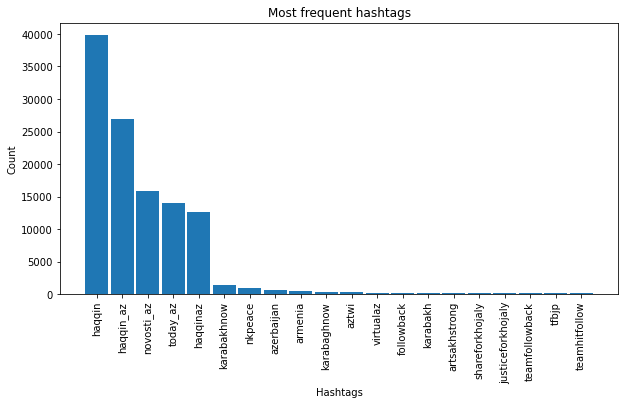

In [31]:
# Plot most frequent items as a bar-chart
# Pay attention to values, if your data spans multiple order of magnitudes use logaritmic scales


# Top 100 hashtags

key_list = list()
value_list = list()

hash_list = findTop100Hashtags(df)[:20]

for item in hash_list:
    key_list.append(item[0])
    value_list.append(item[1])

fig = plt.figure(figsize = (10, 5))
plt.bar(key_list, value_list, width = 0.9)

plt.xlabel('Hashtags')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Most frequent hashtags')

plt.show()

# Temporal analysis

In [32]:
'''
Plot temporal changes (daily, weekly, etc.) for 
 - hashtag activities - done
 - total tweet volumes - done
 - # of unique users - done
 - # of unique hashtags
'''

'\nPlot temporal changes (daily, weekly, etc.) for \n - hashtag activities - done\n - total tweet volumes - done\n - # of unique users - done\n - # of unique hashtags\n'

In [ ]:
# of unique users

len(df['userid'].value_counts())

(33, {'soldiers', 'iran', 'ağdam', 'usa', 'iranattack', 'haqqin', 'khojaly', 'novosti_az', 'qarabağ', 'virtualaz', 'свободулапшину', 'georgia', 'haqqin_az', 'israeli', 'today_az', 'us', 'armenia', 'blogger', 'alkhanli', 'nextyearinshusha', 'jerusalem', 'qarabag', 'wwiil', 'baku', 'soleimani', 'haqqinaz', 'lapshin', 'azerbaijan', 'endoccupation', 'azərbaycanın', 'xankendi', 'iranvsusa', 'karabakhisazerbaijan'})
[33, 197, 10, 331, 158, 62]


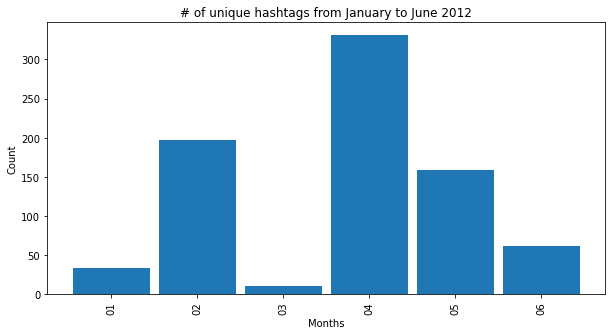

In [33]:
def findNumberofUniqueHashtagbyMonth(df, month):
    hashtag_set = set()
    for i, date in enumerate(df['tweet_time']):
        if date[5:7] == month and date[:4] != '2013':
            hashtag = df.iloc[i]["hashtags"]
            if type(hashtag) is str:
                word_counts = retrieveWords(hashtag)
                for key, value in word_counts.items():
                    if key not in hashtag_set:
                        hashtag_set.add(key)

    return len(hashtag_set), hashtag_set

print(findNumberofUniqueHashtagbyMonth(df, '01'))

hashtag_vol = list()

months = ['01', '02', '03', '04', '05', '06']

for month in months:
    hashtag_vol.append(findNumberofUniqueHashtagbyMonth(df, month)[0])

print(hashtag_vol)

fig = plt.figure(figsize = (10, 5))
bar = plt.bar(months, hashtag_vol, width = 0.9)

plt.xlabel('Months')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('# of unique hashtags from January to June 2012')

plt.show()

In [34]:
def retrieveWords(string):

    arr = []
    lst_word = list()
    word_dict = dict()
    
    for index, char in enumerate(string):
        if char == "'":
            arr.append(index)
            
    for i in range(int(len(arr)/2)):
        elt = string[arr[0]+1:arr[1]].lower()
        lst_word.append(elt)
        arr.remove(arr[0])
        arr.remove(arr[0])
        
    for key in lst_word:
        if key in word_dict.keys():
            word_dict[key] += 1
        else:
            word_dict[key] = 1

    return word_dict

def findTop100Hashtags(df):
    hash_dict = dict()
    for hashtag in df["hashtags"]:
        if type(hashtag) is str:
            word_counts = retrieveWords(hashtag)
            for key, value in word_counts.items():
                if key in hash_dict.keys():
                    hash_dict[key] += value
                else:
                    hash_dict[key] = value
    
    return sorted(hash_dict.items(), key=lambda item: item[1], reverse=True)[:100]

findTop100Hashtags(df)

[('haqqin', 39756),
 ('haqqin_az', 26898),
 ('novosti_az', 15817),
 ('today_az', 13963),
 ('haqqinaz', 12591),
 ('karabakhnow', 1370),
 ('nkpeace', 1034),
 ('azerbaijan', 685),
 ('armenia', 467),
 ('karabaghnow', 384),
 ('aztwi', 294),
 ('virtualaz', 258),
 ('followback', 248),
 ('karabakh', 217),
 ('artsakhstrong', 162),
 ('shareforkhojaly', 125),
 ('justiceforkhojaly', 124),
 ('teamfollowback', 124),
 ('tfbjp', 124),
 ('teamhitfollow', 124),
 ('autofollow', 124),
 ('mustfollow', 124),
 ('followngain', 124),
 ('turkey', 82),
 ('artsakh', 71),
 ('ussr', 67),
 ('sumgait', 50),
 ('turkeycoup', 49),
 ('istanbul', 47),
 ('armenian', 43),
 ('sumgait1988', 42),
 ('ankara', 42),
 ('armeniangenocide', 29),
 ('neveragain', 24),
 ('karabakhisazerbaijan', 23),
 ('azerbaijani', 22),
 ('unaocbaku2016', 22),
 ('stopaliyev', 22),
 ('genocide', 22),
 ('nkr', 21),
 ('ermenisoykırımı', 21),
 ('baku', 20),
 ('russia', 19),
 ('azərbaycan', 18),
 ('chechina', 16),
 ('aliyev', 15),
 ('un', 14),
 ('boycottba

[('haqqin', 5468), ('haqqin', 5232), ('haqqin', 2773), ('haqqin', 3247), ('haqqin', 5837), ('haqqin', 2288)]


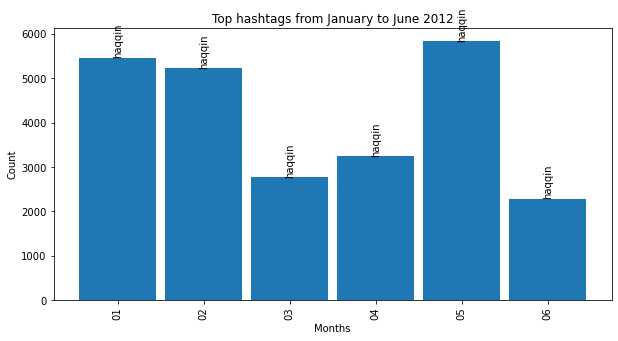

In [35]:
# format = 2012-01-01 16:08

def findTopHashtagbyMonth(df, month):
    hashtag_dict = dict()
    for i, date in enumerate(df['tweet_time']):
        if date[5:7] == month and date[:4] != '2013':
            hashtag = df.iloc[i]["hashtags"]
            if type(hashtag) is str:
                word_counts = retrieveWords(hashtag)
                for key, value in word_counts.items():
                    if key in hashtag_dict.keys():
                        hashtag_dict[key] += value
                    else:
                        hashtag_dict[key] = value

    return sorted(hashtag_dict.items(), key=lambda item: item[1], reverse=True)[:1]

key_list = list()
value_list = list()

hashtag_vol = list()

months = ['01', '02', '03', '04', '05', '06']

for month in months:
    hashtag_vol.append(findTopHashtagbyMonth(df, month)[0])

print(hashtag_vol)

for item in hashtag_vol:
    key_list.append(item[0])
    value_list.append(item[1])

fig = plt.figure(figsize = (10, 5))
bar = plt.bar(months, value_list, width = 0.9)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, key_list[0], ha='center', va='bottom', rotation=90)
    key_list.remove(key_list[0])

plt.xlabel('Months')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Top hashtags from January to June 2012')

plt.show()

In [36]:
# of unique users: 233

# no important temporal changes observed, no need to plot

def findUsersbyDate(df):
    date_dict = dict()
    user_set = set()
    for i, date in enumerate(df['account_creation_date']):
        if df.iloc[i]["userid"] not in user_set:
            user_set.add(df.iloc[i]["userid"])
            if date in date_dict.keys():
                date_dict[date] += 1
            else:
                date_dict[date] = 1
    
    return sorted(date_dict.items(), key=lambda item: item[0], reverse=False)

findUsersbyDate(df)

[('2008-10-28', 1),
 ('2014-08-06', 1),
 ('2014-11-19', 1),
 ('2014-11-20', 1),
 ('2014-12-11', 1),
 ('2016-04-10', 1),
 ('2016-04-27', 1),
 ('2019-02-21', 10),
 ('2019-02-22', 6),
 ('2019-02-23', 2),
 ('2019-02-25', 1),
 ('2019-04-17', 1),
 ('2020-10-03', 1),
 ('2020-10-16', 1),
 ('2020-11-08', 1),
 ('2020-11-23', 1)]

In [ ]:
def findTweetVolume(df):
    date_dict = dict()
    tweet_set = set()
    for i, date in enumerate(df['tweet_time']):
        if df.iloc[i]["tweetid"] not in tweet_set:
            tweet_set.add(df.iloc[i]["tweetid"])
            if date[:10] in date_dict.keys():
                date_dict[date[:10]] += 1
            else:
                date_dict[date[:10]] = 1
    
    return sorted(date_dict.items(), key=lambda item: item[0], reverse=False)

findTweetVolume(df)

In [ ]:
key_list = list()
value_list = list()

tweet_vol = findTweetVolume(df)[:14] # two weeks-14 days

for item in tweet_vol:
    key_list.append(item[0])
    value_list.append(item[1])

fig = plt.figure(figsize = (10, 5))
plt.bar(key_list, value_list, width = 0.9)

plt.xlabel('First two weeks of January 2012')
plt.xticks(rotation = 90)
plt.ylabel('Tweet Volume')
plt.title('Tweet counts for first two weeks of January 2012')

plt.show()

In [ ]:
df.sort_values('account_creation_date', ascending=True)

# Create network structure

In [ ]:
'''
Create two types of network
- hashtag cooccurrence
- information diffusion using RT/mention/quote 

Networks can be created for all the data or using the data created with a period
'''

In [ ]:
import csv, json

import matplotlib
from matplotlib import pyplot as plt

import pandas as pd
import networkx as nx
print('NetworkX version: ', nx.__version__)

In [ ]:


csvFilePath = 'turkey2012.csv'
jsonFilePath = 'turkey2012.jsons'

data = {}
with open(csvFilePath) as csvFile:
    csvReader = csv.DictReader(csvFile)
    for rows in csvReader:
        id= rows['tweetid']
        data[id] = rows
        
        
with open(jsonFilePath, 'w') as jsonFile:
    for k,v in data.items():
        jsonFile.write('{}\n'.format(json.dumps(v)))

In [ ]:
htagData = json.load(open('turkey2012.json', 'r'))

print(len(htagData), 'data points in the file')

turkey2012 = list()

for keys, values in htagData.items():
    turkey2012.append(values)

print('Example data point:\n', turkey2012[0])



In [ ]:
with open('turkey2012.jsons', 'r') as fl:
    for line in fl:
        temp = json.loads(line)
        if len(temp['user_mentions']) > 3:
            print(temp)
            break
            
'''
userid
user_mentions
retweet_userid
in_reply_to_userid
'''

In [37]:
htagNet = nx.Graph()
htagCount = dict()

with open('turkey2012.jsons', 'r') as fl:
    for line in fl:
        temp = json.loads(line)
        try:
            htags = eval(temp['hashtags']) if temp['hashtags'] != ''else []
            for i in range(len(htags)):
                if htags[i] not in htagCount:
                    htagCount[htags[i]] = 0
                htagCount[htags[i]] += 1
                
                for j in range(i+1,len(htags)):
                    if htagNet.has_edge(htags[i], htags[j]):
                        htagNet[htags[i]][htags[j]]['weight'] += 1
                    else:
                        htagNet.add_edge(htags[i], htags[j], weight=1)
        except Exception as e:
            print(e)
            print(temp)
            break
            
for n in htagCount:
    if not htagNet.has_node(n):
        htagNet.add_node(n)
    htagNet.nodes[n]['count'] = htagCount[n]
            
print(nx.info(htagNet))
nx.write_gexf(htagNet, 'hashtagnet.gexf')

FileNotFoundError: [Errno 2] No such file or directory: 'turkey2012.jsons'

In [ ]:
htags = ['a', 'b', 'c', 'd']
for i in range(len(htags)):
    for j in range(i+1,len(htags)):
        print(i, j, htags[i], htags[j])

In [38]:
htagNet = nx.Graph()
htagNet.name = 'Hashtag co-occurrence network'

for rec in turkey2012:
    htagNet.add_edge(rec['follower_count'], rec['tweet_time'], weight=float(rec['following_count']))
    
    print(nx.info(htagNet))

NameError: name 'turkey2012' is not defined

In [ ]:
degreeSeq = dict(nx.degree(htagNet))
for n in sorted(degreeSeq, key=degreeSeq.get, reverse=True)[:10]:
    print(n, degreeSeq[n])
fig = plt.figure(figsize=(4,4))
plt.hist(degreeSeq.values(), color='0.5')
plt.yscale('log')
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Histogram', fontsize=14)